In [2]:
!pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached soupsieve-2.2-py3-none-any.whl (33 kB)
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1279 sha256=0b80ceea28f6c4a247735dbba7b61679a542ac9ad676bd056f95949ed8842691
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [3]:
import requests
from bs4 import BeautifulSoup

In [4]:
# get the HTML

url = "https://www.imdb.com/list/ls099106768/?sort=user_rating,desc&st_dt=&mode=detail&page=1"
r = requests.get(url)
htmlContent = r.content

In [5]:
# parse the HTML

soup = BeautifulSoup(htmlContent, 'html.parser')

In [7]:
soup.title.text

'2020 Bollywood - IMDb'

In [10]:
movies = soup.findAll('div',{'class':'lister-item mode-detail'})
movies[0]

<div class="lister-item mode-detail">
<div class="lister-item-image ribbonize" data-tconst="tt10199974">
<a href="/title/tt10199974/"> <img alt="Pareeksha" class="loadlate" data-tconst="tt10199974" height="209" loadlate="https://m.media-amazon.com/images/M/MV5BMGE0YjBlY2MtMDc1MS00NWU1LWJjOTktNGVkMDYxZDI5MGZiXkEyXkFqcGdeQXVyMTIxMjE2NzIz._V1_UY209_CR2,0,140,209_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="140"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt10199974/">Pareeksha</a>
<span class="lister-item-year text-muted unbold">(2020)</span>
</h3>
<p class="text-muted text-small">
<span class="certificate">UA</span>
<span class="ghost">|</span>
<span class="runtime">120 min</span>
<span class="ghost">|</span>
<span class="genre">
Drama            </span>
</p>
<div class="ipl-rating-widget">
<div class="ipl-rating-star small">
<span class=

In [118]:
first_movie = movies[0]

In [30]:
first_movie.h3.a.text

'Pareeksha'

In [106]:
first_movie.find('span',{'class':'certificate'}).text

'UA'

In [27]:
first_movie.find('span',{'class':'ipl-rating-star__rating'}).text

'8.1'

In [31]:
first_movie.find('span',{'class':'runtime'}).text

'120 min'

In [54]:
first_movie.find('span',{'class':'genre'}).text.strip()

'Drama'

In [61]:
first_movie.find('span',{'name':'nv'})['data-value']

'2783'

In [55]:
first_movie.find('p',{'class':''}).text.strip()

'The film revolves around the story of an ordinary rickshaw driver in Bihar who aspires and dreams of providing a maximum possible quality education to his son by making arrangements for him to study at a private English medium school.'

In [124]:
mname = []
mduration = []
mgenre = []
mrating = []
mcertificate = []
mvotes = []

for m in movies:
    mname.append(m.h3.a.text)
    mduration.append(m.find('span', {'class':'runtime'}).text)
    mgenre.append(m.find('span', {'class':'genre'}).text.strip())
    mrating.append(m.find('span', {'class':'ipl-rating-star__rating'}).text)
    mvotes.append(m.find('span', {'name':'nv'})['data-value'])

In [125]:
mdetails = list(zip(mname, mduration, mgenre, mrating, mvotes))

In [126]:
import pandas as pd

In [143]:
df = pd.DataFrame(mdetails, columns = ['Movie', 'Duration', 'Genre', 'Rating', 'Votes'])
df.head()

,Movie,Duration,Genre,Rating,Votes
0,Pareeksha,120 min,Drama,8.1,2783
1,Kaamyaab,109 min,Drama,7.9,3548
2,Chintu Ka Birthday,80 min,"Drama, War",7.8,3820
3,Lootcase,132 min,"Comedy, Crime",7.6,13867
4,Tanhaji: The Unsung Warrior,135 min,"Action, Biography, Drama",7.6,21384


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Movie     57 non-null     object
 1   Duration  57 non-null     object
 2   Genre     57 non-null     object
 3   Rating    57 non-null     object
 4   Votes     57 non-null     object
dtypes: object(5)
memory usage: 2.4+ KB


In [145]:
df['Duration'] = df['Duration'].apply(lambda x:x.strip(' min'))
df['Duration'] = pd.to_numeric(df['Duration'])

In [146]:
df.head()

,Movie,Duration,Genre,Rating,Votes
0,Pareeksha,120,Drama,8.1,2783
1,Kaamyaab,109,Drama,7.9,3548
2,Chintu Ka Birthday,80,"Drama, War",7.8,3820
3,Lootcase,132,"Comedy, Crime",7.6,13867
4,Tanhaji: The Unsung Warrior,135,"Action, Biography, Drama",7.6,21384


In [147]:
df['Votes'] = pd.to_numeric(df['Votes'])

In [148]:
df['Rating'] = pd.to_numeric(df['Rating'])

Check Top 5 most voted movies

In [149]:
df.sort_values(by = ['Votes'], ascending=False).head(5)

,Movie,Duration,Genre,Rating,Votes
17,Dil Bechara,101,"Comedy, Drama, Romance",6.6,112248
41,Chhapaak,120,"Biography, Drama",5.1,24813
4,Tanhaji: The Unsung Warrior,135,"Action, Biography, Drama",7.6,21384
5,Raat Akeli Hai,149,"Crime, Drama, Mystery",7.3,14643
14,Thappad,142,Drama,6.8,14280


Check 3 most long Duration movies

In [150]:
df.sort_values(by = ['Duration'], ascending=False).head(3)

,Movie,Duration,Genre,Rating,Votes
5,Raat Akeli Hai,149,"Crime, Drama, Mystery",7.3,14643
52,Street Dancer 3D,146,"Drama, Music",3.6,5642
6,Angrezi Medium,145,"Comedy, Drama",7.3,10870


Check Top 3 most rated Romance movies

In [151]:
df[df['Genre'].str.contains('Comedy')].head(3)

,Movie,Duration,Genre,Rating,Votes
3,Lootcase,132,"Comedy, Crime",7.6,13867
6,Angrezi Medium,145,"Comedy, Drama",7.3,10870
9,Chaman Bahaar,111,"Comedy, Drama",7.0,5401


Check Top 5 most voted Comedy movies

In [152]:
df[df['Genre'].str.contains('Comedy')].sort_values(by = ['Votes'], ascending=False).head(5)

,Movie,Duration,Genre,Rating,Votes
17,Dil Bechara,101,"Comedy, Drama, Romance",6.6,112248
3,Lootcase,132,"Comedy, Crime",7.6,13867
6,Angrezi Medium,145,"Comedy, Drama",7.3,10870
22,Gulabo Sitabo,124,"Comedy, Drama",6.3,10829
33,Shubh Mangal Zyada Saavdhan,117,"Comedy, Romance",5.8,7855


In [153]:
import seaborn as sns

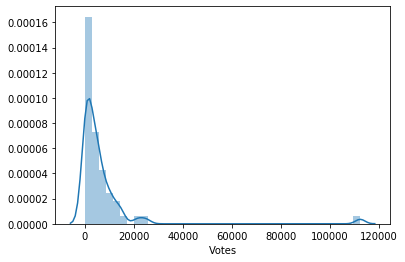

In [157]:
sns.distplot(df['Votes'])

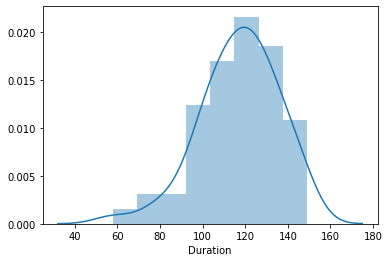

In [156]:
sns.distplot(df['Duration'])

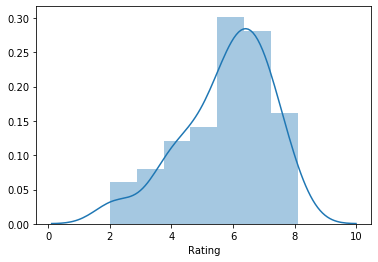

In [154]:
sns.distplot(df['Rating'])

## Testing

In [62]:
first_movie.find('p',{'class':'text-muted text-small'},'a')

<p class="text-muted text-small">
<span class="certificate">UA</span>
<span class="ghost">|</span>
<span class="runtime">120 min</span>
<span class="ghost">|</span>
<span class="genre">
Drama            </span>
</p>

In [67]:
first_movie.find('p',{'class':'text-muted text-small'}).find_all('a')

<p class="text-muted text-small">
<span class="certificate">UA</span>
<span class="ghost">|</span>
<span class="runtime">120 min</span>
<span class="ghost">|</span>
<span class="genre">
Drama            </span>
</p>

In [84]:
for my_tag in first_movie.find_all(class_='text-muted text-small'):
    print(my_tag)

<p class="text-muted text-small">
<span class="certificate">UA</span>
<span class="ghost">|</span>
<span class="runtime">120 min</span>
<span class="ghost">|</span>
<span class="genre">
Drama            </span>
</p>
<p class="text-muted text-small">
    Director:
<a href="/name/nm0422552/">Prakash Jha</a>
<span class="ghost">|</span> 
    Stars:
<a href="/name/nm1300009/">Adil Hussain</a>, 
<a href="/name/nm3140757/">Priyanka Bose</a>, 
<a href="/name/nm11629796/">Shourya Deep</a>, 
<a href="/name/nm10628484/">Shubham</a>
</p>
<p class="text-muted text-small">
<span class="text-muted">Votes:</span>
<span data-value="2783" name="nv">2,783</span>
</p>


In [101]:
for my_tag in first_movie.find_all(class_='text-muted text-small'):
    print(my_tag.find('a'))

None
<a href="/name/nm0422552/">Prakash Jha</a>
None


In [87]:
l1 = []
for my_tag in first_movie.find_all(class_='text-muted text-small'):
    l1.append(my_tag)
print(l1[1])



<p class="text-muted text-small">
    Director:
<a href="/name/nm0422552/">Prakash Jha</a>
<span class="ghost">|</span> 
    Stars:
<a href="/name/nm1300009/">Adil Hussain</a>, 
<a href="/name/nm3140757/">Priyanka Bose</a>, 
<a href="/name/nm11629796/">Shourya Deep</a>, 
<a href="/name/nm10628484/">Shubham</a>
</p>
None
